In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Data Analysis

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Gender', ylabel='count'>

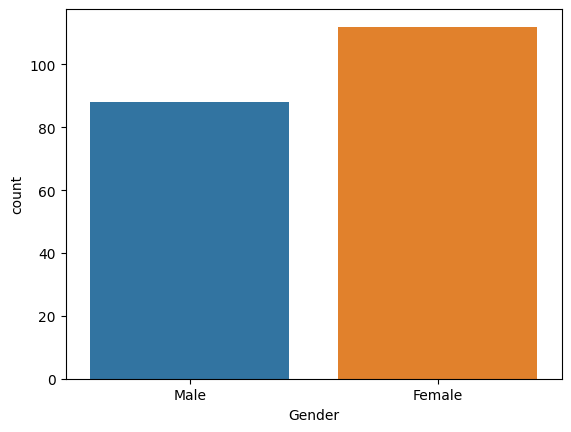

In [ ]:
sns.countplot(df, x="Gender")

Text(0.5, 1.0, 'Scatter plot between Gender and Annual Income')

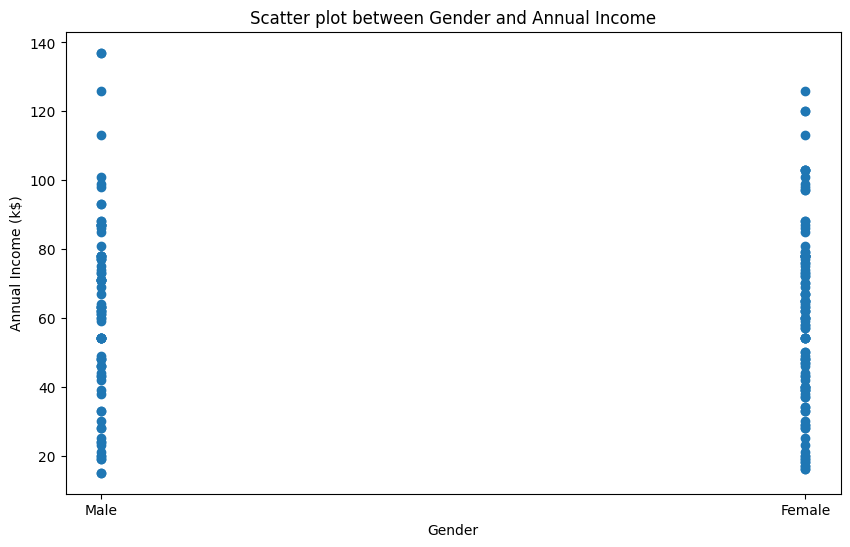

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Gender'],df['Annual Income (k$)']);
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter plot between Gender and Annual Income')

Text(0.5, 1.0, 'Scatter plot between Gender and Spendings')

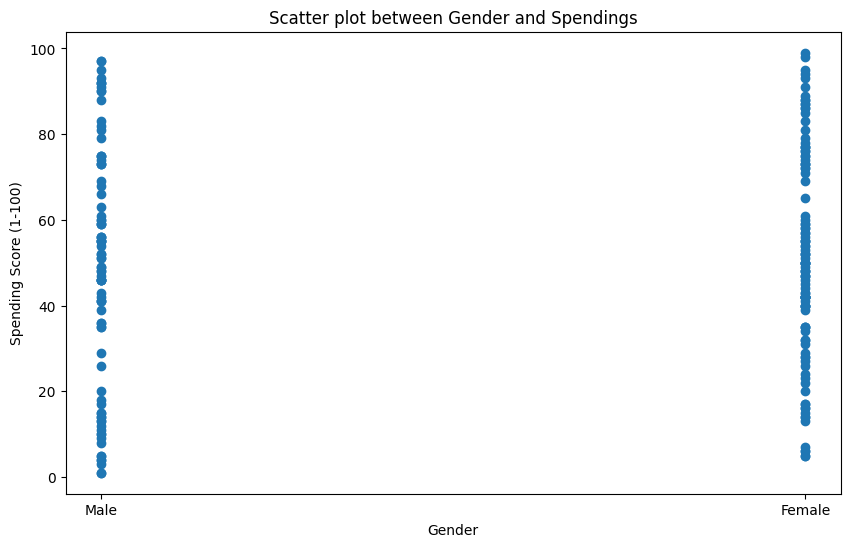

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Gender'],df['Spending Score (1-100)']);
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot between Gender and Spendings')

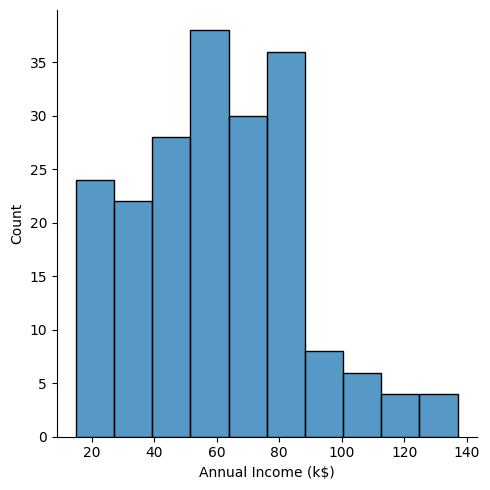

In [26]:
sns.displot(df['Annual Income (k$)'])

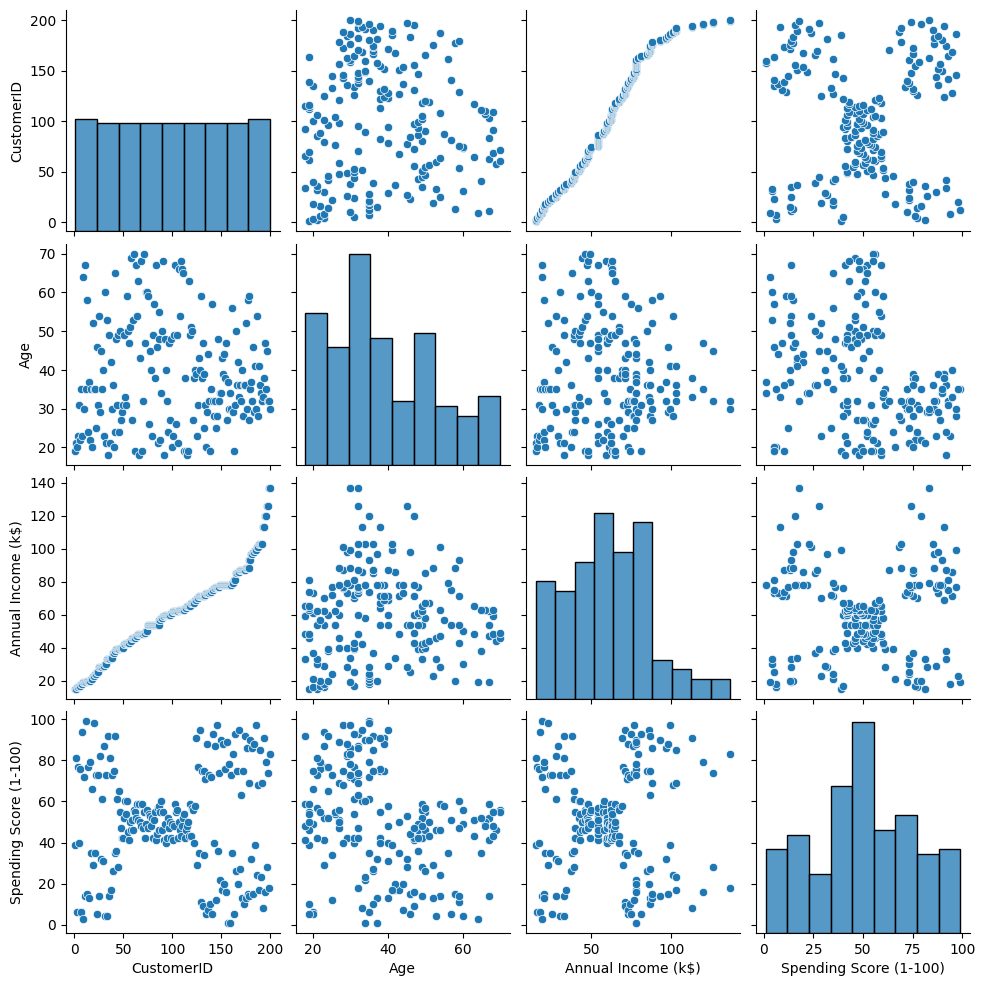

In [27]:
sns.pairplot(df)

<ipython-input-32-5a9361b72d86>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap((df.corr()).drop(columns = ['CustomerID']), annot = True)


<Axes: >

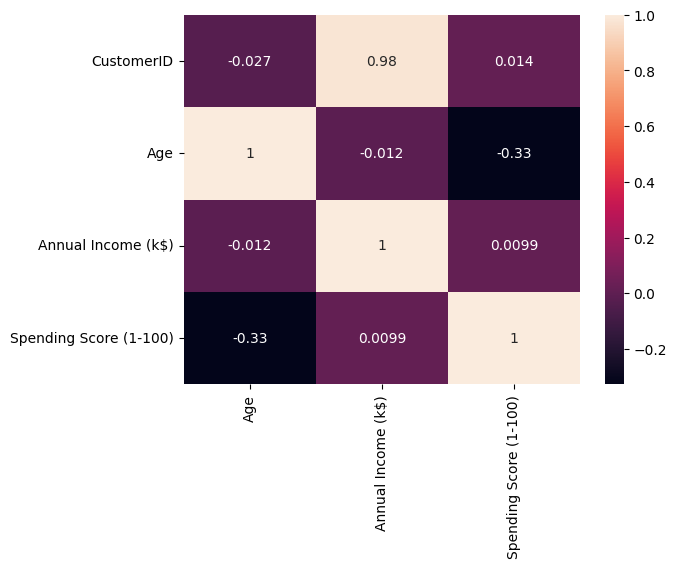

In [32]:
sns.heatmap(df.corr(), annot = True)

KMeans

In [5]:
from sklearn.cluster import KMeans

In [6]:
sa_data = df.drop(columns = ['Gender', 'Age', 'CustomerID']).values
# sa_data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

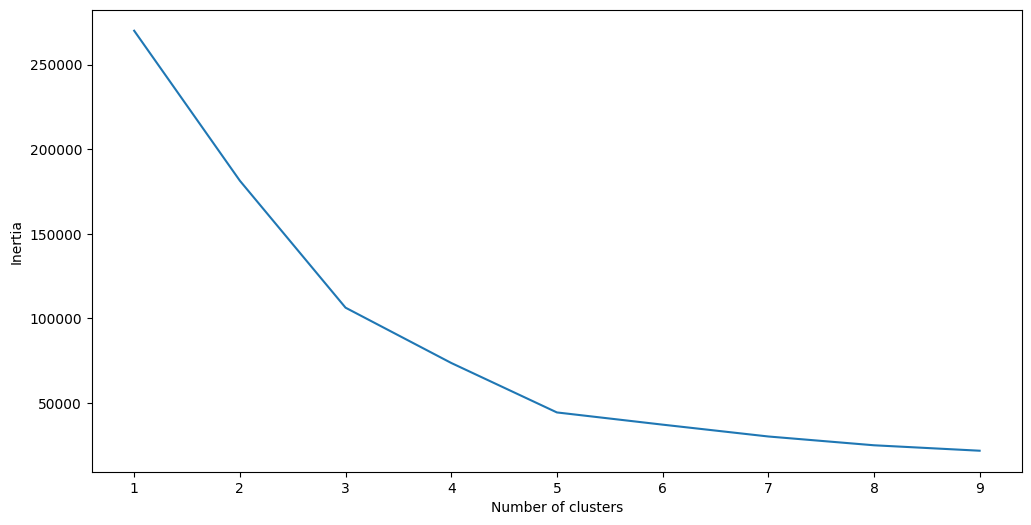

In [ ]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(sa_data)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
# frame
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
k_model = KMeans(n_clusters = 5, init='k-means++')

In [ ]:
fit = k_model.fit_predict(n_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


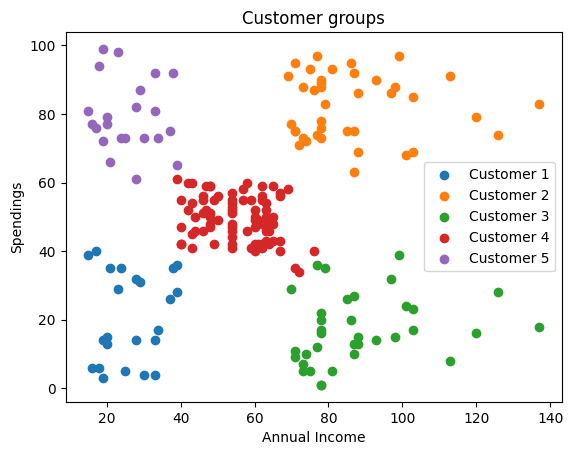

In [ ]:
label = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
for i in range(0, 5):
  plt.scatter(sa_data[fit == i, 0], sa_data[fit == i, 1], label = label[i])
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spendings')
plt.legend()
plt.show()

In [ ]:
data = df.drop(columns = ['Gender', 'Spending Score (1-100)', 'CustomerID']).values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

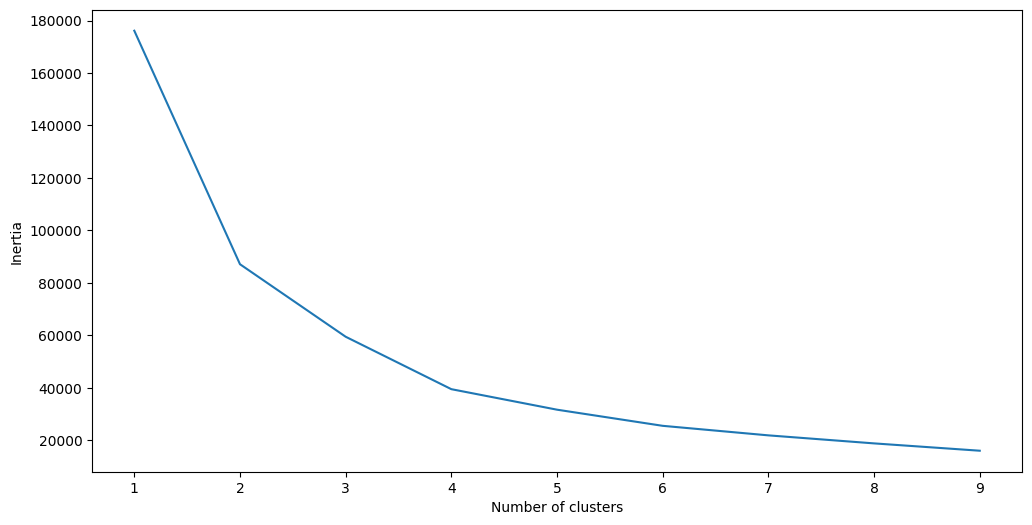

In [ ]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
# frame
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
k2_model = KMeans(n_clusters = 4, init='k-means++')

In [ ]:
fit2 = k2_model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


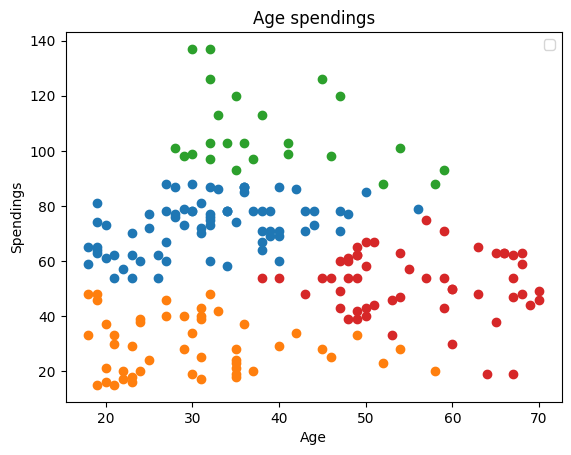

In [23]:
for i in range(0, 4):
  plt.scatter(data[fit2 == i, 0], data[fit2 == i, 1])
plt.title('Age spendings')
plt.xlabel('Age')
plt.ylabel('Spendings')
plt.legend()
plt.show()

In [8]:
dff = pd.get_dummies(df)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [20]:
a_data = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

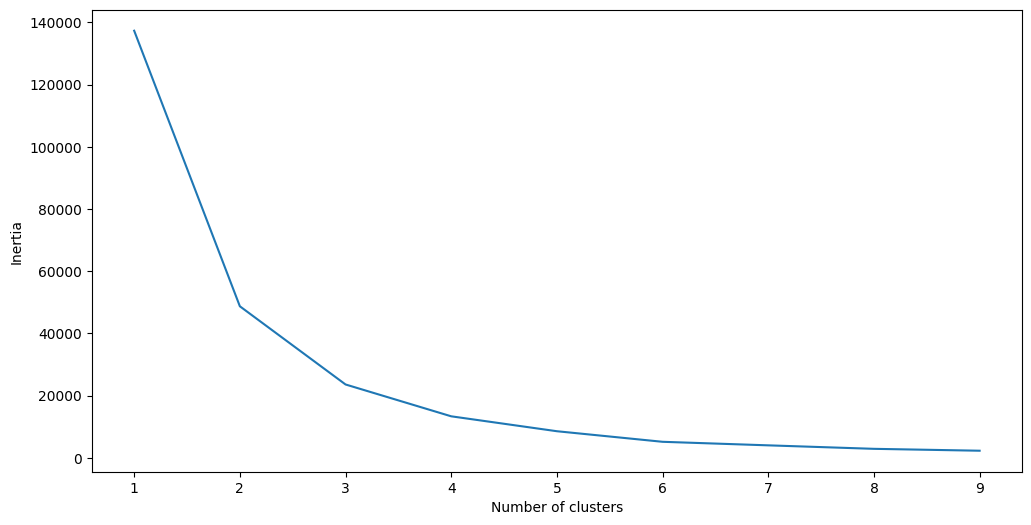

In [21]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(a_data)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
# frame
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')